# Chapter 2: 绘制2维向量 Drawing with 2D Vectors

## 2.1 Picturing 2D Vectors

In [2]:
%load_ext autoreload
%autoreload 2
# 这里从导入了相同文件夹下的vector_drawing所有东西，用from ... import * 导入
from vector_drawing import *

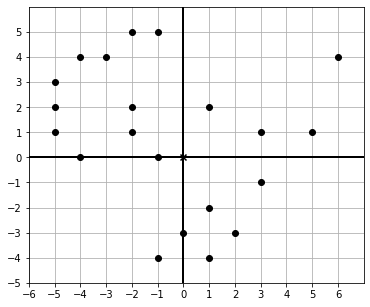

In [3]:
# 书P21
# 使用原组如(6, 4)表示二维点，下面是点的一个列表[(6,4), ..........]
dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2),
                (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]
# 这里使用的*不是指针，是将列表中的元素一个个取出来作为参数，下面会给出一个示例
draw(
    Points(*dino_vectors)
)


In [4]:
# *的使用, 观察输出的区别
array = [12, 3, (90, 30)]
print(array)
print(*array)

[12, 3, (90, 30)]
12 3 (90, 30)


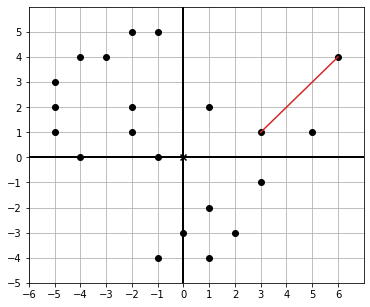

In [5]:
# 书P21
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1), color=red)
)

**EXERCISE:** Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices.

**书P24页练习2.4**: 构建一个以 `dino_vectors` 为顶点的 `Polygon` 对象，画出将每个点相连的恐龙图像

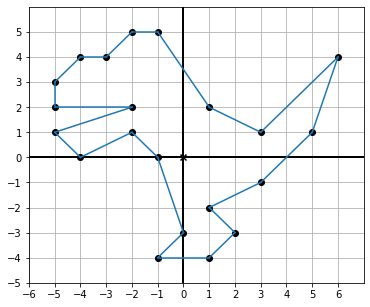

In [6]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**EXERCISE** Draw the vectors `[(x,x**2) for x in range(-10,11)]` as points (dots) using the draw function.  What is the result?

**书P25-练习2.5**: 当$x$坐标在-10到10的范围内时，使用 `draw` 函数绘制表示向量`(x, x**2)` 的点。

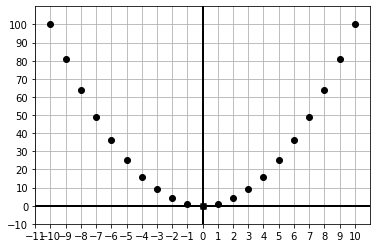

In [7]:
draw(
    Points(*[(x, x**2) for x in range(-10,11)]),
    grid=(1,10), # 每个1个单位水平网格线，每10单位垂直网格线
    nice_aspect_ratio=False # x，y轴比例可以不相同
)

# 平面向量运算 Plane Vector Arithmetic

书P25

In [8]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [9]:
# 书P27
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

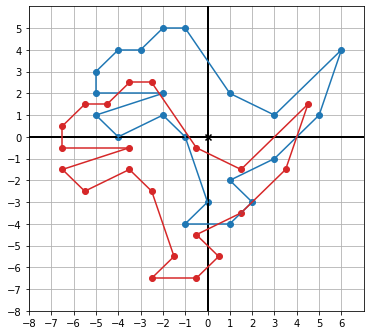

In [10]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

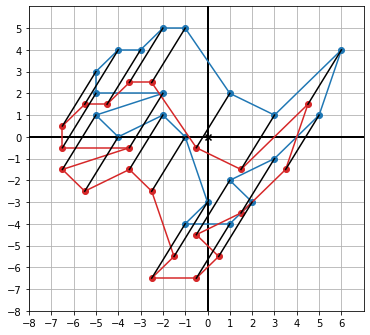

In [11]:
arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

## 向量的分量和长度 Vector components and lengths

书P29

In [12]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

## 减法，位移和距离  Subtraction, displacement, and distance

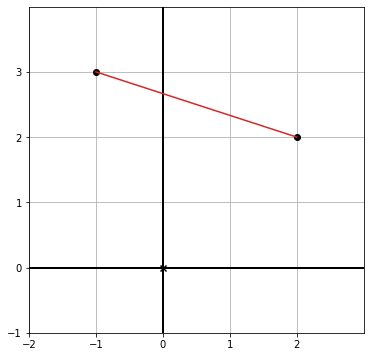

In [13]:
# 书P33绘制v和w的差
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

**书P34 练习2.7（小项目）**: 通过将所有向量各自的$x$坐标和$y$坐标相加，可以实现任何数量的向量相加。例如，向量和$(1,2) + (2,4) + (3,6) + (4,8)$ 有$x$分量 $1+2+3+4=10$ 与$y$分量 $2 + 4 + 6 + 8 = 20$ ，结果为$(10,20)$。实现新的 $add$ 函数，接受任意多个向量作为参数。

**MINI-PROJECT:** You can add any number of vectors together by summing all of their $x$-coordinates and all of their $y$-coordinates.  For instance the four-fold sum (1,2) + (2,4) + (3,6) + (4,8) has $x$-component 1 + 2 + 3 + 4 = 10 and $y$-component 2 + 4 + 6 + 8 = 20, making the result (10,20).  Implement a revised add function that takes any number of vectors as arguments.

In [14]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

**书P34 练习2.8**: 实现函数 translate(translation, vectors)， 接受一个平移向量和一个向量列表，返回一个根据平移向量平移后的向量列表。例如，`translate((1,1), [(0,0), (0,1), (-3,-3)])` 应该返回 `[(1,1),(1,2),(-2,-2)]`.

**EXERCISE:** Write a function translate(translation, vectors) that takes in a translation vector and a list of input vectors and returns a list of the input vectors all translated by the translation vector. For instance, `translate((1,1), [(0,0), (0,1), (-3,-3)])` should return `[(1,1),(1,2),(-2,-2)]`.

In [15]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

translate((1,1), [(0,0), (0,1,), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

**书P35 练习 2.11**: 手绘100个小恐龙是一个难题，来看看计算机图形学的威力。

**MINI-PROJECT:** Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.  This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

In [16]:
def hundred_dinos():
    translations = [(12*x,10*y) 
                    for x in range(-5,5) 
                    for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue)
                for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)

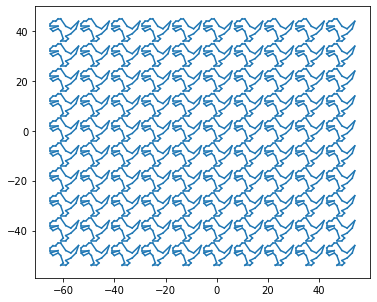

In [17]:
hundred_dinos()

**书P37 练习2.15**: What vector in the dino_vectors list has the longest length?  Use the Python length function to compute the answer quickly. (不翻译了，自己看得懂哈)

In [18]:
# 这里max的第一个参数是可迭代的列表dino_vectors，
# 然后可选参数key=length中的length是之前定义的函数，这里用于比较dino_vectors的元素之间的大小
max(dino_vectors, key=length)

(6, 4)

In [19]:
# 这里介绍一下max的使用方法
# 文档： https://docs.python.org/zh-cn/3/library/functions.html?highlight=max#max

# 1.如果只提供了一个位置参数，它必须是非空 iterable，返回可迭代对象中最大的元素；
max1 = max([12, 32, 42, 12])
# 2.如果提供了两个及以上的位置参数，则返回最大的位置参数。
max2 = max(12, 90, 23, 12)

# key 实参指定排序函数用的参数
def distance_to618(number):
    """返回到6.18的距离大小"""
    return abs(number-6.18)
max3 = max(4, 5, 6, 9.26,  key=distance_to618)

print("max1:", max1, "max2:", max2, "max3:", max3)

max1: 42 max2: 90 max3: 9.26


**P37 练习2.16**: 假设向量 $\vec{w}$ 的坐标是 $(\sqrt{2} ,\sqrt{3})$. 那么 $\pi \cdot \vec{w}$ 的坐标近似值是多少？ 画出原向量和新向量。

**EXERCISE:** Suppose a vector $\vec{w}$ has coordinates $(\sqrt{2} ,\sqrt{3})$.  What are the approximate coordinates of the scalar multiple $\pi \cdot \vec{w}$?  Draw an approximation of the original vector and the new vector.

In [20]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))
w_scaled

(4.442882938158366, 5.441398092702653)

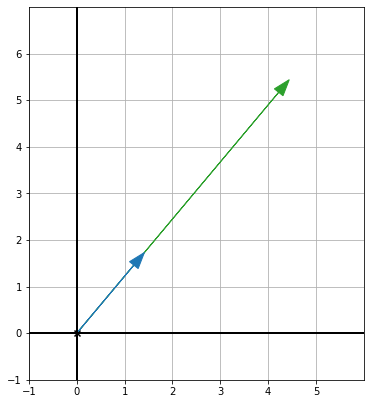

In [21]:
draw(
    Arrow(w_scaled, color=green),
    Arrow(w, color=blue)
)

**P38 练习2.17**: 写一个函数 `scale(s, v)`, 将输入向量 `v` 和输入标量 `s` 相乘。

**EXERCISE:** Write a python function `scale(s, v)` that multiplies the input vector `v` by the input scalar `s`.

In [22]:
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

**P38 练习2.19（小项目）:** 假定 $\vec{u} = (-1,1)$ 和 $\vec{v} = (1,1)$, $r$ 和 $s$ 是实数，并且假设 $$-1 < r < 1$ and $-3 < s < 3$.

向量$r \cdot \vec{u} + s \cdot \vec{v}$在平面上可能的终点是什么?

注意:向量和数字的操作顺序是一样的:我们假设先进行标量乘法，然后进行向量加法(除非括号中另有说明)。

**MINI-PROJECT:** Suppose $\vec{u} = (-1,1)$ and $\vec{v} = (1,1)$ and suppose $r$ and $s$ are real numbers.  Specifically, let’s assume $-1 < r < 1$ and $-3 < s < 3$.  

Where are the possible points on the plane where the vector $r \cdot \vec{u} + s \cdot \vec{v}$ could end up?  

Note: the order of operations is the same for vectors as it is for numbers: we assume scalar multiplication is carried out first, and then vector addition (unless parentheses specify otherwise).

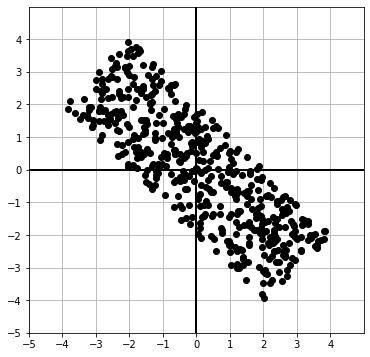

In [23]:
from random import uniform
# uniform函数在[a, b)或[a, b]范围内获取一个随机数。

u = (-1, 1)
v = (1, 1)

def random_r():
    return uniform(-3, 3)

def random_s():
    return uniform(-1, 1)


possibilities = [add(scale(random_r(), u), scale(random_s(), v))
                 for i in range(0, 500)]
draw(
    Points(*possibilities)
)


**P39 练习2.21:** 实现python函数 `subtract(v1,v2)`, 返回 `v1` - `v2`。 该函数接受两个二维向量作为输入，返回一个二维向量作为输出。

**EXERCISE:** Write a Python function `subtract(v1,v2)` that returns the result of `v1` minus `v2`, where the inputs and output are tuples of coordinates as we’ve seen so far.

In [24]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

**P40 练习2.25:**实现Python函数 `distance(v1, v2)`, 返回两个输入向量之间的距离。（注意，上一个练习中的 `subtract` 函数已经实现了两个向量之间的位移。

实现另一个函数 `perimeter(vectors)`，它接受一个向量列表作为参数，并返回每个向量到下一个向量的距离之和（包含末位向量与首位向量之间的距离），以此来获取向量几何 `dino_vectors` 所定义的恐龙周长。

**EXERCISE:** Write a Python function `distance(v1,v2)` that returns the distance between two input vectors (noting that the subtract function from the previous exercise already gives the displacement).  

Write another Python function `perimeter(vectors)` that takes a list of vectors as an argument and returns the sum of distances from each vector to the next, including the distance from the last vector to the first.  What is the perimeter of the polygon defined by `dino_vectors`?

In [25]:
def distance(v1,v2):
    return length(subtract(v1,v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

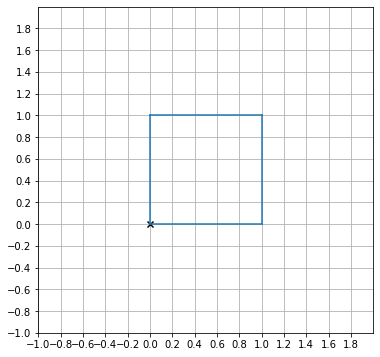

In [26]:
# 用正方形进行测试
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [27]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [28]:
perimeter(dino_vectors)

44.77115093694563

**P41 练习2.26:** 令 $\vec{u}$ 为向量 $(1,2)$。假定有另一个正整数坐标为 $(n, m)（n > m）$的向量 $\vec{v}$，且它与 $\vec{u}$ 的距离是13，那么从 $\vec{u}$ 到 $\vec{v}$ 的位移是所少？

**MINI-PROJECT:** Let $\vec{u}$ be the vector $(1,2)$.  Suppose there is another vector, $\vec{v}$, with positive integer coordinates $(n, m)$ such that $n > m$, and having distance $13$ from $\vec{u}$.  What is the displacement from $\vec{u}$ to $\vec{v}$?  Hint: you can use Python to search for the vector $\vec{v}$.

**解决方案:** 我们只需要搜索可能的整数对(n,m)，其中n在1的前后13个单位内，m在-1的前后13个单位内。

**SOLUTION:** We only need to search possible integer pairs (n,m) where n is within 13 units of 1 and m is within 13 units of -1.

In [29]:
for m in range(1, 13):
    for n in range(m+1, 15):
        if distance((n,m), (1,-1)) == 13:
            print((n,m))

(13, 4)


# 平面上的角度和三角学  Angles and trigonometry in the plane

P41

## python中的弧度和三角学 Radians and trigonometry in python

In [30]:
from math import tan
tan(45) 
# 45弧度，而不是45度
# tangent of 45 radians, not degrees

1.6197751905438615

In [31]:
from math import tan, pi
tan(pi/4)
# 现在是 pi/4 弧度 = 45度
# now this is the tangent of pi/4 radians = 45 degrees

0.9999999999999999

In [32]:
# P47
from math import sin, cos
def to_cartesian(polar_vector):
    """接受一对极坐标，返回对应的笛卡尔坐标"""
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

In [33]:
# P47 验证沿着37度的方向移动5个单位可以接近点（4，3）
# Verify that 5 units @ 37 degrees takes us to (4,3)
angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [34]:
from math import asin
print(sin(1), asin(0.8414709848078965))

0.8414709848078965 1.0


In [35]:
# 找出一个角x, 使 sin x = 3/sqrt(13)
# trying to find an angle x such that sin x = 3/sqrt(13)
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [36]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [37]:
cos(2.1587989303424644)

-0.5547001962252293

In [38]:
-2/sqrt(13)

-0.5547001962252291

In [39]:
sin(2.1587989303424644)

0.8320502943378436

In [40]:
3/sqrt(13)

0.8320502943378437

In [41]:
# math.atan2(y, x) 以弧度为单位返回 atan(y / x)，在 -pi 和 pi 之间
# math.atan2的具体使用看这里：
# https://docs.python.org/zh-cn/3/library/math.html?highlight=math%20atan2#math.atan2
from math import atan2
atan2(3,-2)

2.158798930342464

In [42]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [43]:
to_polar((1,0))

(1.0, 0.0)

In [44]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

**P50 练习2.27:** 确认笛卡尔坐标(-1.34,2.68)对应的向量的长度约为3

**EXERCISE:** Confirm that the vector given by cartesian coordinates (-1.34,2.68) has length approximately 3, as expected.

In [45]:
length((-1.34,2.68))

2.9963310898497184



**EXERCISE:** What is $116.57^\circ$ in radians?  Use Python to compute the tangent of this angle, and confirm that it is close to $-2$ as we saw above.

**SOLUTION:** $116.57^\circ · (1 \text{rad} / 57.296^\circ) = 2.035 \text{rad}.$

In [46]:
tan(2.035)

-1.9972227673316139

**EXERCISE:** Locate the angle $10\pi/6$.  Do you expect the values of $\cos(10\pi/6)$ and $\sin(10\pi/6)$ to be positive or negative?  Use Python to calculate their values and confirm.

**SOLUTION:** The angle $\pi/6$ is one third of a quarter-turn, so $10\pi/6$ is less than a quarter turn short of a full rotation.  This means that it points "down and to the right".  The cosine should be positive and the sine should be negative, since distance in this direction corresponds with positive horizontal displacement and negative vertical displacement.

In [47]:
sin(10*pi/6)

-0.8660254037844386

In [48]:
cos(10*pi/6)

0.5

**EXERCISE:** The following list comprehension creates 1000 points in polar coordinates.  

In [49]:
polar_coords = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]

In Python code, convert them to cartesian coordinates, and connect them in a closed loop with line segments to draw a picture.

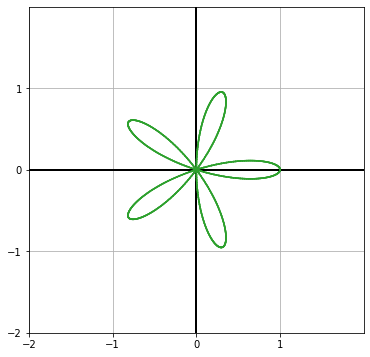

In [50]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

**EXERCISE:** Find the angle to get to the point (-2,3) by “guess-and-check”.  

In [51]:
# we want to make guesses between pi/2 and pi
pi, pi/2

(3.141592653589793, 1.5707963267948966)

In [52]:
tan(1.8)

-4.286261674628062

In [53]:
tan(2.5)

-0.7470222972386602

In [54]:
tan(2.2)

-1.3738230567687948

In [55]:
tan(2.1)

-1.7098465429045078

In [56]:
tan(2.15)

-1.5289797578045667

In [57]:
tan(2.16)

-1.4961035416162771

In [58]:
tan(2.155)

-1.5124173422757465

In [59]:
tan(2.156)

-1.50913489938793

In [60]:
tan(2.157)

-1.505862348872722

In [61]:
tan(2.158)

-1.5025996395625056

In [62]:
# we conclude the angle is between 2.158 and 2.159.
tan(2.159)

-1.4993467206361923

**EXERCISE:**  Find another point in the plane with the same tangent as $\theta$, that is $-3/2$.  Use Python’s implementation of the arctangent function, `math.atan`, to find the value of this angle.

In [63]:
from math import atan

In [64]:
atan(-3/2)

-0.982793723247329

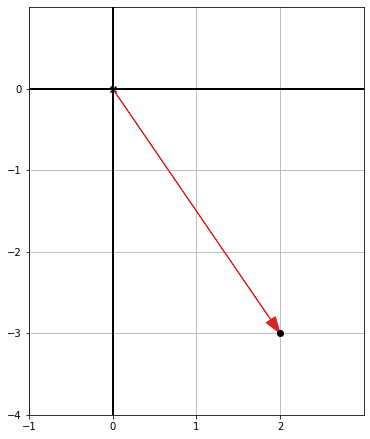

In [65]:
# this is the direction to the point (2,-3).  
# tan(-3/2) = tan(-1.5) = tan(3/-2)
draw(Arrow((2,-3)), Points((2,-3)))

**EXERCISE:** Without using Python, what are polar coordinates corresponding to the cartesian coordinates $(1,1)$ and $(1,-1)$?  Once you’ve found the answers, use to_polar to check your work.

**SOLUTION:** The answers should be $(\sqrt{2},\pi/4)$ and $(\sqrt{2},-\pi/4)$.

In [66]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

In [67]:
to_polar((1,-1))

(1.4142135623730951, -0.7853981633974483)

In [68]:
#compare to
(sqrt(2), pi/4)

(1.4142135623730951, 0.7853981633974483)

In [69]:
(sqrt(2), -pi/4)

(1.4142135623730951, -0.7853981633974483)

# 向量集合的变换  Transforming collections of vectors

P57

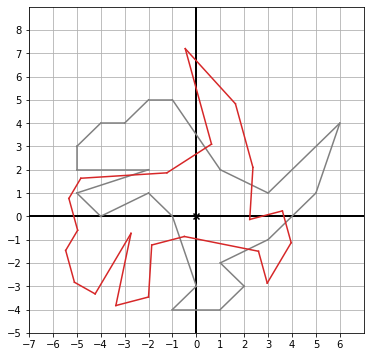

In [70]:
rotation_angle = pi/3

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

**P60 练习2.42:** 实现 `rotate(angle, vectors)` 函数，接受笛卡尔坐标向量数组，并将这些向量旋转指定的角度（根据角度的正负来确定是逆时针还是顺时针）。

**EXERCISE:** Create a `rotate(angle, vectors)` function which takes an array of input vectors in cartesian coordinates and returns them by the specified angle (counterclockwise or clockwise according to whether the angle is positive or negative). 

In [71]:
def rotate(angle, vectors):
    """将向量组vectors中的所有元素都逆时针旋转角度angle"""
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

## 组合向量变换  Combining vector transformations

P59

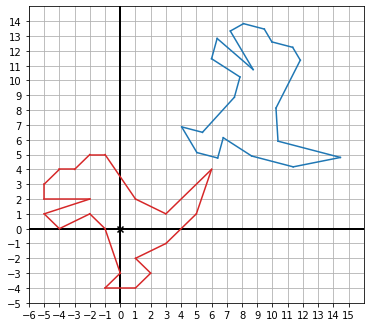

In [76]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

draw(
    Polygon(*new_dino, color=blue),
    Polygon(*dino_vectors, color=red)
)

**P60 练习2.43:** 实现函数 `regular_polygon(n)`, 返回一个规则 $n$ 边形的各顶点的笛卡尔坐标。

In [73]:
def regular_polygon(n):
    """返回一个规则 n 边形的各顶点的笛卡尔坐标。"""
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

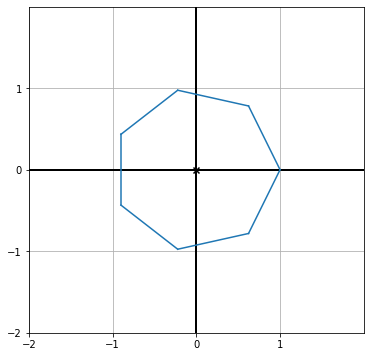

In [85]:
draw(
    Polygon(*regular_polygon(7))
)

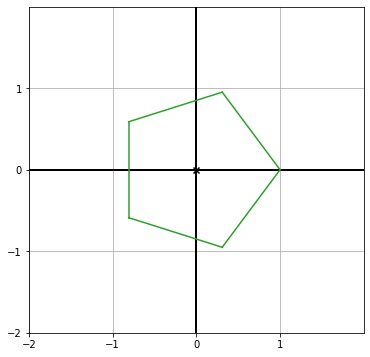

In [87]:
draw(
    Polygon(*regular_polygon(5), color=green)
)